# **EDA - <span style='color:red'>E</span>xploratory <span style='color:red'>D</span>ata <span style='color:red'>A</span>nalysis : Data Visualization**

In [43]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt      
import seaborn as sns


In [44]:
df=pd.read_csv('Data set after cleaning.csv')

In [45]:
df['Grade']=df['Grade'].astype(int)

In [46]:
df

,Name of the game,Fit platform,Num Of comments,Num Of likes,Grade,Num of pros,Num of cons,First Released,The game rviewer,The date of the review
0,0,1.0,52.0,5.0,9,5.0,4.0,2004.0,19,2022.0
1,1,1.0,45.0,10.0,8,4.0,2.0,2008.0,73,2022.0
2,2,1.0,261.0,15.0,5,3.0,3.0,2022.0,77,2022.0
3,3,1.0,32.0,11.0,8,3.0,2.0,2022.0,77,2022.0
4,4,1.0,32.0,9.0,6,3.0,3.0,2022.0,117,2022.0
...,...,...,...,...,...,...,...,...,...,...
2881,2881,1.0,2.0,4.0,7,3.0,2.0,2009.0,130,2009.0
2882,2882,1.0,3.0,0.0,7,3.0,2.0,2009.0,130,2009.0
2883,2883,1.0,1.0,3.0,7,3.0,3.0,2009.0,115,2009.0
2884,2884,1.0,3.0,10.0,7,3.0,3.0,2009.0,115,2009.0


## The number of games according to Grades

Text(0, 0.5, 'Amount')

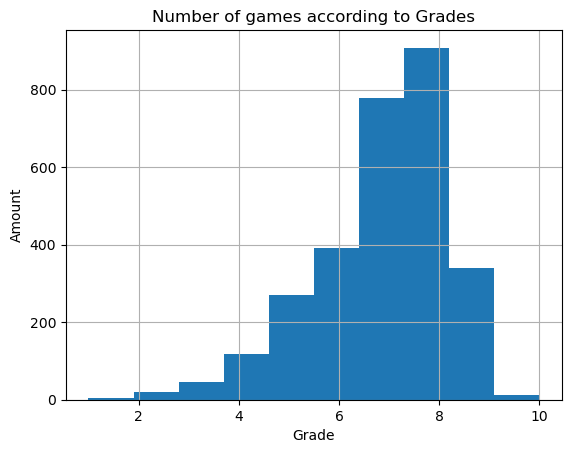

In [47]:
df['Grade'].hist(bins=10)
plt.title('Number of games according to Grades')
plt.xlabel('Grade')
plt.ylabel('Amount')

## Number of articles per year

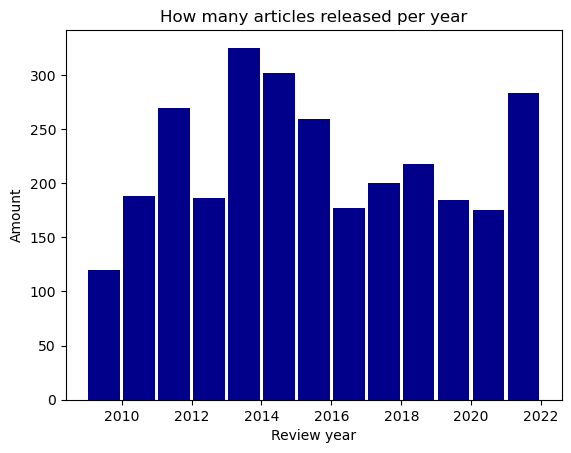

In [48]:
df['The date of the review'].hist(bins=13, grid = False, rwidth=0.9, color ='darkblue')
plt.xlabel('Review year')
plt.ylabel('Amount')
plt.title('How many articles released per year')
plt.show()


## Number of games released per year

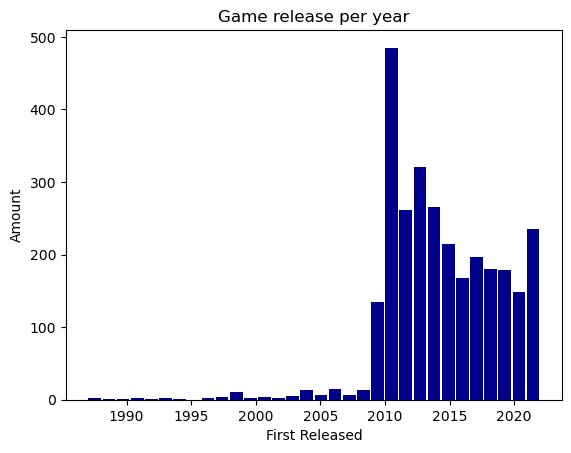

In [49]:
df['First Released'].hist(bins=32, grid = False, rwidth=0.9, color ='darkblue')
plt.xlabel('First Released')
plt.ylabel('Amount')
plt.title('Game release per year')
plt.show()

## Graphs showing the grade comparing the num of comments and likes

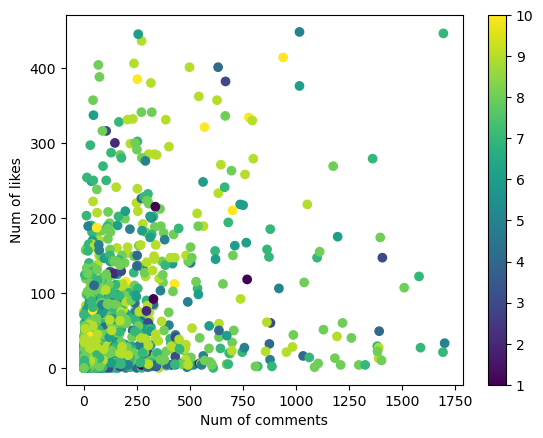

In [50]:
x = df['Num Of comments']
y = df['Num Of likes']
z = df['Grade']

plt.scatter(x, y, c=z, cmap='viridis')
plt.xlabel('Num of comments')
plt.ylabel('Num of likes')
plt.colorbar()
plt.show()


### <span style='color:blue'>  we can see that the number of comments when the grade is low and when the grade is high is the same. It is possible to distinguish cases where a game is good and receives many good comments versus a game that is not good and receives many negative comments
    

<AxesSubplot:xlabel='Grade'>

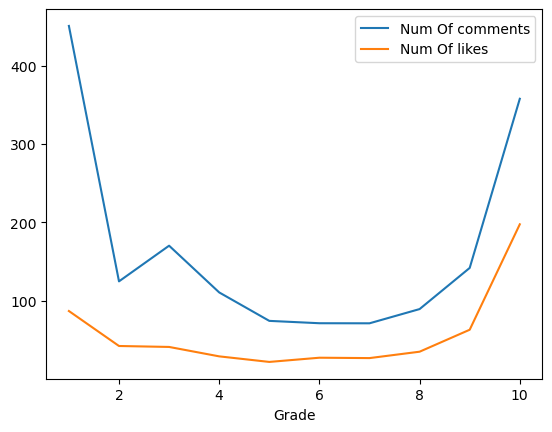

In [51]:
k=df.groupby(['Grade']).mean()[['Num Of comments','Num Of likes']]
k.plot()

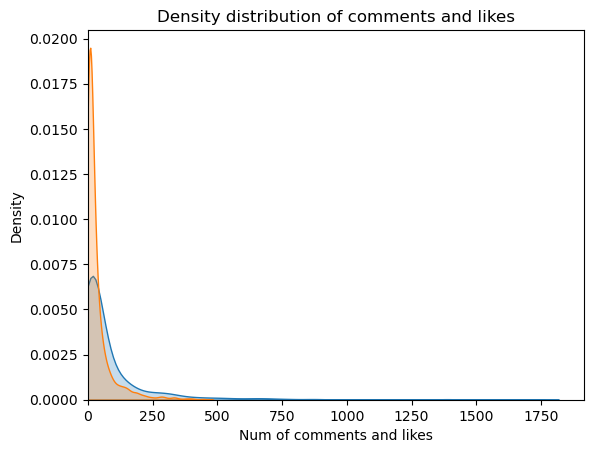

In [52]:

ax = sns.kdeplot(df['Num Of comments'], shade=True)
sns.kdeplot(df['Num Of likes'], shade=True)

ax.set_xlim(xmin=0) #set x-axis limit to start from 0
ax.set(xlabel='Num of comments and likes', ylabel='Density')
plt.title('Density distribution of comments and likes')

plt.show()

### A graph showing the grade comparing the number of pros and cons according to the author of the review


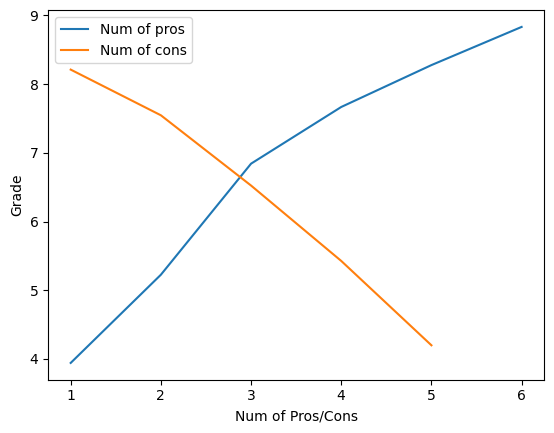

In [53]:
k = df.groupby(['Num of pros'])['Grade'].mean()
k.plot(label='Num of pros')

l = df.groupby(['Num of cons'])['Grade'].mean()
l.plot(label='Num of cons')

plt.xlabel('Num of Pros/Cons')
plt.ylabel('Grade')
plt.legend()
plt.show()

## Graph depicting the amount of pros comparing the grade

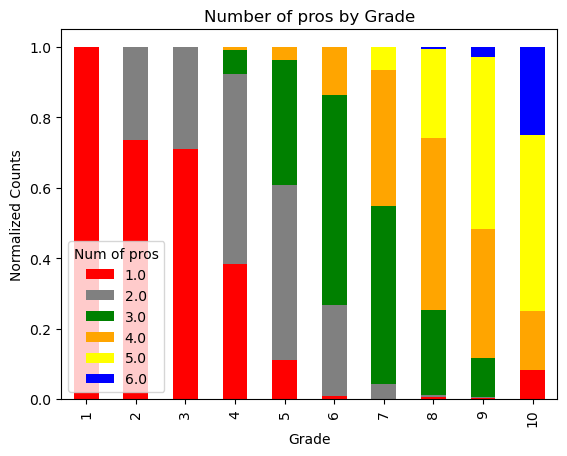

In [75]:
ct = pd.crosstab(df['Grade'] ,df['Num of pros'], normalize ='index')

colors = ["red", "gray", "green", "orange","yellow", "blue"]
ct.plot.bar(stacked=True, color = colors)

plt.xlabel("Grade")
plt.ylabel("Normalized Counts")
plt.title("Number of pros by Grade")
plt.show()





## Graph depicting the amount of cons comparing the grade

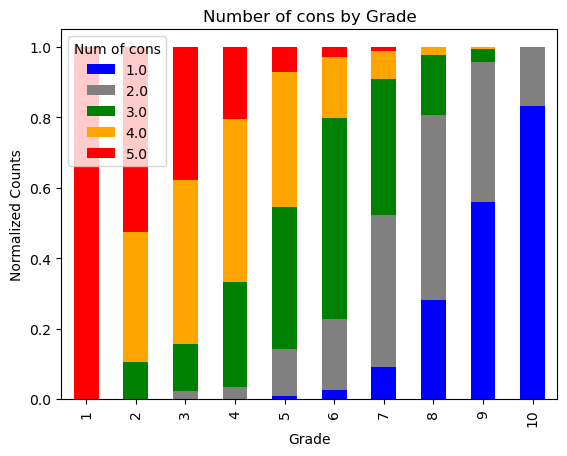

In [70]:
ct = pd.crosstab(df['Grade'] , df['Num of cons'], normalize ='index')
colors = ["blue", "gray", "green", "orange", "red"]
ct.plot.bar(stacked=True, color = colors)
plt.xlabel("Grade")
plt.ylabel("Normalized Counts")
plt.title("Number of cons by Grade")
plt.show()


## Heatmap of Grade vs Pros and Cons

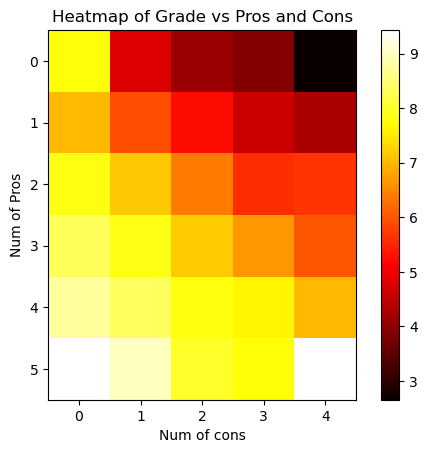

In [56]:
dft = df.pivot_table(values='Grade', index='Num of pros', columns='Num of cons')
plt.imshow(dft, cmap='hot')
plt.xlabel('Num of cons')
plt.ylabel('Num of Pros')
plt.title('Heatmap of Grade vs Pros and Cons')
plt.colorbar()
plt.show()